In [4]:
# transpose RNAseq_df for probe IDs become rows
transposed_RNAseq_df = RNAseq_df.set_index('ID_REF').T

# remove empty RNA count rows
transposed_RNAseq_df = transposed_RNAseq_df[transposed_RNAseq_df.sum(axis = 1) > 0]
transposed_RNAseq_df.head()

ID_REF,GSM1682614,GSM1682615,GSM1682616,GSM1682617,GSM1682618,GSM1682619,GSM1682620,GSM1682621,GSM1682622,GSM1682623,...,GSM1682787,GSM1682788,GSM1682789,GSM1682790,GSM1682791,GSM1682792,GSM1682793,GSM1682794,GSM1682795,GSM1682796
1007_s_at,492.5,992.2914,639.92070,1586.2420,673.6545,551.4573,813.2,923.1,936.8,447.4,...,526.0,386.99880,437.0,1158.5080,424.8953,307.7,690.0,489.7,1520.1,608.7
1053_at,988.5,1671.2480,2475.51500,1669.5160,2246.7310,3581.8830,2036.9,3010.8,1842.4,2510.9,...,3089.0,2089.25400,2114.9,1776.0150,3228.1410,2592.3,1728.6,1819.2,1934.7,2529.7
117_at,1677.0,312.9964,369.92770,395.1871,857.8096,283.2488,1500.6,556.7,1709.3,137.5,...,260.2,289.74540,1857.9,2136.7030,684.3458,560.6,171.4,359.4,502.4,337.6
121_at,2856.2,1514.2330,2167.40500,1687.8940,1973.0640,2442.9510,2501.9,945.0,1620.9,1004.6,...,1690.2,1917.71600,3028.3,1978.1750,1530.3450,1570.6,2796.8,2421.2,4157.4,2931.3
1255_g_at,197.5,68.7998,93.66864,137.2908,83.8687,121.9621,495.8,151.9,81.3,228.8,...,31.9,85.57195,548.4,157.8446,174.4753,157.8,246.3,235.1,663.4,167.4


In [5]:
transposed_RNAseq_df.shape

(16383, 183)

In [6]:
annotation_df = pd.read_csv("/kaggle/input/april10aml/Processed Datasets/gene_annotation.csv")
annotation_df.head()

/tmp/ipykernel_34/1877367778.py:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  annotation_df = pd.read_csv("/kaggle/input/april10aml/Processed Datasets/gene_annotation.csv")


,ID,GB_ACC,SPOT_ID,Species Scientific Name,Annotation Date,Sequence Type,Sequence Source,Target Description,Representative Public ID,Gene Title,Gene Symbol,ENTREZ_GENE_ID,RefSeq Transcript ID,Gene Ontology Biological Process,Gene Ontology Cellular Component,Gene Ontology Molecular Function
0,1007_s_at,U48705,NaN,Homo sapiens,"Oct 6, 2014",Exemplar sequence,Affymetrix Proprietary Database,U48705 /FEATURE=mRNA /DEFINITION=HSU48705 Huma...,U48705,discoidin domain receptor tyrosine kinase 1 //...,DDR1 /// MIR4640,780 /// 100616237,NM_001202521 /// NM_001202522 /// NM_001202523...,0001558 // regulation of cell growth // inferr...,0005576 // extracellular region // inferred fr...,0000166 // nucleotide binding // inferred from...
1,1053_at,M87338,NaN,Homo sapiens,"Oct 6, 2014",Exemplar sequence,GenBank,M87338 /FEATURE= /DEFINITION=HUMA1SBU Human re...,M87338,"replication factor C (activator 1) 2, 40kDa",RFC2,5982,NM_001278791 /// NM_001278792 /// NM_001278793...,0000278 // mitotic cell cycle // traceable aut...,0005634 // nucleus // inferred from electronic...,0000166 // nucleotide binding // inferred from...
2,117_at,X51757,NaN,Homo sapiens,"Oct 6, 2014",Exemplar sequence,Affymetrix Proprietary Database,X51757 /FEATURE=cds /DEFINITION=HSP70B Human h...,X51757,heat shock 70kDa protein 6 (HSP70B'),HSPA6,3310,NM_002155,0000902 // cell morphogenesis // inferred from...,0005737 // cytoplasm // inferred from direct a...,0000166 // nucleotide binding // inferred from...
3,121_at,X69699,NaN,Homo sapiens,"Oct 6, 2014",Exemplar sequence,GenBank,X69699 /FEATURE= /DEFINITION=HSPAX8A H.sapiens...,X69699,paired box 8,PAX8,7849,NM_003466 /// NM_013951 /// NM_013952 /// NM_0...,0001655 // urogenital system development // in...,0005634 // nucleus // inferred from direct ass...,0000979 // RNA polymerase II core promoter seq...
4,1255_g_at,L36861,NaN,Homo sapiens,"Oct 6, 2014",Exemplar sequence,Affymetrix Proprietary Database,L36861 /FEATURE=expanded_cds /DEFINITION=HUMGC...,L36861,guanylate cyclase activator 1A (retina),GUCA1A,2978,NM_000409 /// XM_006715073,0007165 // signal transduction // non-traceabl...,0001750 // photoreceptor outer segment // infe...,0005509 // calcium ion binding // inferred fro...


In [7]:
# merge annotation to RNA count df using probe IDs as keys
merged_RNAseq_df = transposed_RNAseq_df.merge(annotation_df[['ID', 'Gene Symbol']], left_index=True, right_on='ID', how='left')

# set Gene Symbol as index, drop gene_annotation ID column and rename Gene Symbol to ID
merged_RNAseq_df.set_index('Gene Symbol', inplace=True)
merged_RNAseq_df.drop('ID', axis=1, inplace=True)
merged_RNAseq_df.index.name = 'ID_REF'
# transpose back to original format
annotated_RNAseq_df = merged_RNAseq_df.T

annotated_RNAseq_df.head()


ID_REF,DDR1 /// MIR4640,RFC2,HSPA6,PAX8,GUCA1A,MIR5193 /// UBA7,THRA,PTPN21,CCL5,CYP2E1,...,GUCY1A2,ZNF124,NFIC,GLYAT,ZNF141,CH25H,H6PD,SIRPB1,PCDH8,NaN
GSM1682614,492.5000,988.500,1677.0000,2856.200,197.50000,3948.200,749.4000,216.50000,1561.100,117.1000,...,136.00000,3003.800,489.8000,379.60000,945.8000,102.70000,95.00000,1124.5000,91.40000,2573.400
GSM1682615,992.2914,1671.248,312.9964,1514.233,68.79980,6455.948,585.3797,33.89514,1053.610,278.7386,...,190.01090,4108.014,1030.2210,109.02470,767.2295,11.72884,173.57690,169.2777,5.28214,1985.431
GSM1682616,639.9207,2475.515,369.9277,2167.405,93.66864,10215.440,682.4297,50.10245,6135.089,316.6735,...,330.32360,5128.173,1402.8630,195.03890,331.0485,101.89820,207.26920,245.7526,46.15807,3002.954
GSM1682617,1586.2420,1669.516,395.1871,1687.894,137.29080,4501.796,403.4219,18.10369,19350.590,177.1738,...,367.85490,5427.443,807.0797,73.01001,926.1743,230.80090,119.15180,195.9008,13.60067,2641.230
GSM1682618,673.6545,2246.731,857.8096,1973.064,83.86870,5533.674,530.7810,32.94907,12308.010,256.1002,...,18.18558,2551.292,1081.4950,219.95090,371.7992,177.03040,21.19365,1220.5080,192.27200,1311.488


In [8]:
# drop NaN columns from df
columns_to_drop = annotated_RNAseq_df.columns[pd.isnull(annotated_RNAseq_df.columns)]
Final_annotated_RNAseq_df = annotated_RNAseq_df.drop(columns_to_drop, axis=1)

# split each column name on '///', keep the first part, and strip any leading/trailing spaces (clean up of column headers)
Final_annotated_RNAseq_df.columns = [name.split('///')[0].strip() for name in Final_annotated_RNAseq_df.columns]

#print(Final_annotated_RNAseq_df.columns)
Final_annotated_RNAseq_df.head()


,DDR1,RFC2,HSPA6,PAX8,GUCA1A,MIR5193,THRA,PTPN21,CCL5,CYP2E1,...,IL11,GUCY1A2,ZNF124,NFIC,GLYAT,ZNF141,CH25H,H6PD,SIRPB1,PCDH8
GSM1682614,492.5000,988.500,1677.0000,2856.200,197.50000,3948.200,749.4000,216.50000,1561.100,117.1000,...,182.20000,136.00000,3003.800,489.8000,379.60000,945.8000,102.70000,95.00000,1124.5000,91.40000
GSM1682615,992.2914,1671.248,312.9964,1514.233,68.79980,6455.948,585.3797,33.89514,1053.610,278.7386,...,410.95720,190.01090,4108.014,1030.2210,109.02470,767.2295,11.72884,173.57690,169.2777,5.28214
GSM1682616,639.9207,2475.515,369.9277,2167.405,93.66864,10215.440,682.4297,50.10245,6135.089,316.6735,...,173.86440,330.32360,5128.173,1402.8630,195.03890,331.0485,101.89820,207.26920,245.7526,46.15807
GSM1682617,1586.2420,1669.516,395.1871,1687.894,137.29080,4501.796,403.4219,18.10369,19350.590,177.1738,...,251.78640,367.85490,5427.443,807.0797,73.01001,926.1743,230.80090,119.15180,195.9008,13.60067
GSM1682618,673.6545,2246.731,857.8096,1973.064,83.86870,5533.674,530.7810,32.94907,12308.010,256.1002,...,99.94088,18.18558,2551.292,1081.4950,219.95090,371.7992,177.03040,21.19365,1220.5080,192.27200


In [9]:
Final_annotated_RNAseq_df_T = Final_annotated_RNAseq_df.T
Final_annotated_RNAseq_df_T.shape

(14079, 183)

In [10]:
# Aggregate duplicates by taking the mean
df_aggregated = Final_annotated_RNAseq_df_T.groupby(Final_annotated_RNAseq_df_T.index).mean()

df_final = df_aggregated.T

In [11]:
df_final.head()

,A2M,A2M-AS1,A2ML1,AACSP1,AADAC,AADACP1,AAGAB,AAK1,AAMP,AARS,...,ZSCAN23,ZSCAN30,ZSCAN4,ZSCAN5A,ZSCAN9,ZSWIM2,ZW10,ZWINT,ZYX,hsa-let-7a-3
GSM1682614,624.0000,565.4000,319.150000,122.00000,42.30000,133.20000,1665.8500,3243.25000,3165.100,3788.100,...,224.800000,232.600000,40.700000,32.00000,766.3000,12.40000,3176.100,15749.800,6048.300,53.10000
GSM1682615,304.3068,1830.8620,180.760200,29.77288,19.57422,16.81159,1073.9378,955.75520,3099.435,4816.217,...,265.609050,461.835233,287.470500,21.22742,982.4437,6.70331,2215.543,8534.358,4854.398,19.03580
GSM1682616,463.7667,435.2649,109.134580,175.72920,170.30440,46.75180,1073.1912,3872.55975,3407.074,5915.971,...,92.529765,331.697060,106.360175,50.70005,1743.9510,8.50921,2248.957,8522.965,9705.064,55.37656
GSM1682617,352.3943,3821.8520,93.762615,22.78340,89.42802,96.05951,1046.8060,3127.73030,2210.060,5844.127,...,125.734465,455.775400,26.124795,63.00554,678.2092,11.66550,3923.253,8376.515,5949.995,26.36266
GSM1682618,388.0160,388.3800,326.465700,27.50754,43.43768,7.19693,1452.0909,6702.01330,1992.970,4339.333,...,236.682150,231.958157,19.562850,23.93678,663.8115,20.07734,2700.176,9423.422,10205.880,48.58318


In [12]:
gene_order = df_final.columns.tolist()

In [13]:
df_final.to_csv("/kaggle/working/df_final.csv", index=False)

In [15]:
print(df_final.index.is_unique)

True


In [16]:
cohort = pd.read_csv("/kaggle/input/aml-dataset/Chort.csv")
cohort = cohort.drop(['AGE', 'GENDER'], axis=1)
cohort.head()

,ID_REF,SUBTYPES
0,GSM1682614,M1
1,GSM1682615,M1
2,GSM1682616,M2
3,GSM1682617,M1
4,GSM1682618,M5


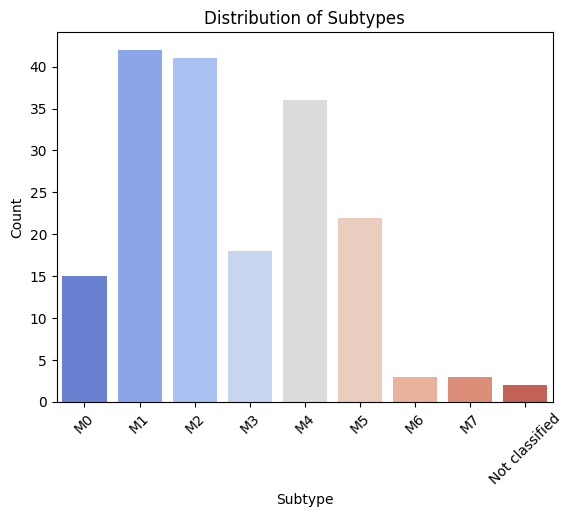

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# order of the subtypes
subtype_order = ['M0', 'M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'Not classified']

# hist
sns.countplot(data=cohort, x='SUBTYPES', order=subtype_order, palette='coolwarm' )
plt.title('Distribution of Subtypes')
plt.xlabel('Subtype')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate labels to make them readable if necessary
plt.show()

In [18]:
# merging subtypes from cohort df to transposed RNA_seq_df
AML_subtype_df = df_final.merge(cohort[['ID_REF','SUBTYPES']], left_index=True, right_on='ID_REF', how='left')

#fix for issue with column indexing
columns = ['ID_REF', 'SUBTYPES'] + [col for col in AML_subtype_df.columns if col not in ['ID_REF', 'SUBTYPES']]
AML_subtype_df = AML_subtype_df[columns]


AML_subtype_df.head()

#print(AML_subtype_df.columns)

,ID_REF,SUBTYPES,A2M,A2M-AS1,A2ML1,AACSP1,AADAC,AADACP1,AAGAB,AAK1,...,ZSCAN23,ZSCAN30,ZSCAN4,ZSCAN5A,ZSCAN9,ZSWIM2,ZW10,ZWINT,ZYX,hsa-let-7a-3
0,GSM1682614,M1,624.0000,565.4000,319.150000,122.00000,42.30000,133.20000,1665.8500,3243.25000,...,224.800000,232.600000,40.700000,32.00000,766.3000,12.40000,3176.100,15749.800,6048.300,53.10000
1,GSM1682615,M1,304.3068,1830.8620,180.760200,29.77288,19.57422,16.81159,1073.9378,955.75520,...,265.609050,461.835233,287.470500,21.22742,982.4437,6.70331,2215.543,8534.358,4854.398,19.03580
2,GSM1682616,M2,463.7667,435.2649,109.134580,175.72920,170.30440,46.75180,1073.1912,3872.55975,...,92.529765,331.697060,106.360175,50.70005,1743.9510,8.50921,2248.957,8522.965,9705.064,55.37656
3,GSM1682617,M1,352.3943,3821.8520,93.762615,22.78340,89.42802,96.05951,1046.8060,3127.73030,...,125.734465,455.775400,26.124795,63.00554,678.2092,11.66550,3923.253,8376.515,5949.995,26.36266
4,GSM1682618,M5,388.0160,388.3800,326.465700,27.50754,43.43768,7.19693,1452.0909,6702.01330,...,236.682150,231.958157,19.562850,23.93678,663.8115,20.07734,2700.176,9423.422,10205.880,48.58318


In [19]:
# filter out rows where 'SUBTYPES' column is 'Not classified'
filtered_df = AML_subtype_df.loc[cohort['SUBTYPES'] != 'Not classified']
filtered_df.head()

,ID_REF,SUBTYPES,A2M,A2M-AS1,A2ML1,AACSP1,AADAC,AADACP1,AAGAB,AAK1,...,ZSCAN23,ZSCAN30,ZSCAN4,ZSCAN5A,ZSCAN9,ZSWIM2,ZW10,ZWINT,ZYX,hsa-let-7a-3
0,GSM1682614,M1,624.0000,565.4000,319.150000,122.00000,42.30000,133.20000,1665.8500,3243.25000,...,224.800000,232.600000,40.700000,32.00000,766.3000,12.40000,3176.100,15749.800,6048.300,53.10000
1,GSM1682615,M1,304.3068,1830.8620,180.760200,29.77288,19.57422,16.81159,1073.9378,955.75520,...,265.609050,461.835233,287.470500,21.22742,982.4437,6.70331,2215.543,8534.358,4854.398,19.03580
2,GSM1682616,M2,463.7667,435.2649,109.134580,175.72920,170.30440,46.75180,1073.1912,3872.55975,...,92.529765,331.697060,106.360175,50.70005,1743.9510,8.50921,2248.957,8522.965,9705.064,55.37656
3,GSM1682617,M1,352.3943,3821.8520,93.762615,22.78340,89.42802,96.05951,1046.8060,3127.73030,...,125.734465,455.775400,26.124795,63.00554,678.2092,11.66550,3923.253,8376.515,5949.995,26.36266
4,GSM1682618,M5,388.0160,388.3800,326.465700,27.50754,43.43768,7.19693,1452.0909,6702.01330,...,236.682150,231.958157,19.562850,23.93678,663.8115,20.07734,2700.176,9423.422,10205.880,48.58318


In [20]:
filtered_df.to_csv("/kaggle/working/AML.csv", index=False)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


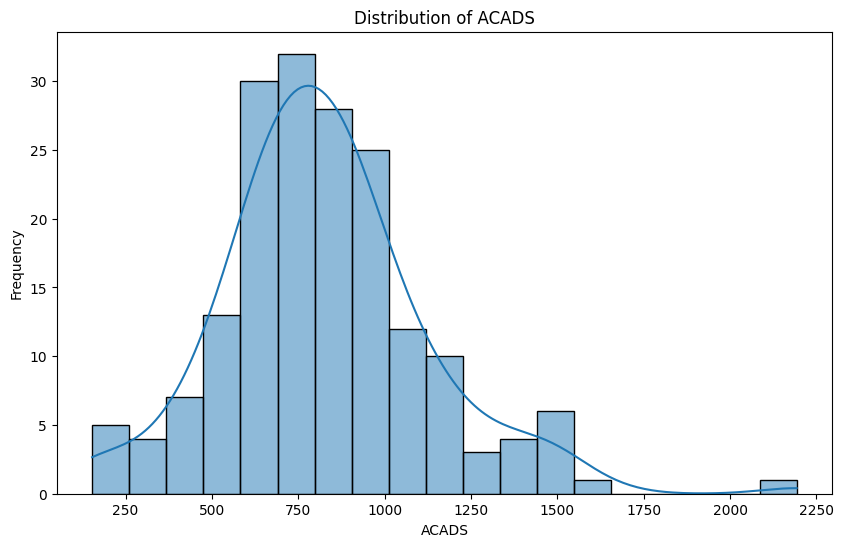

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


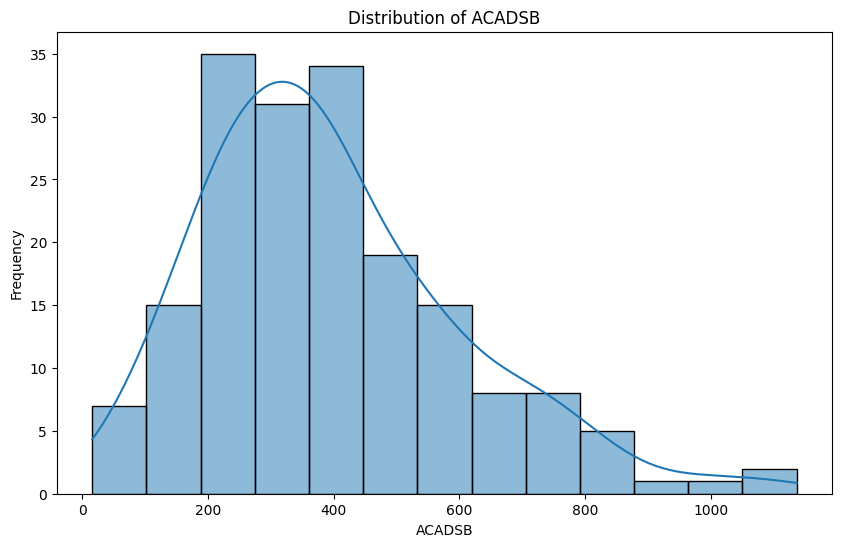

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


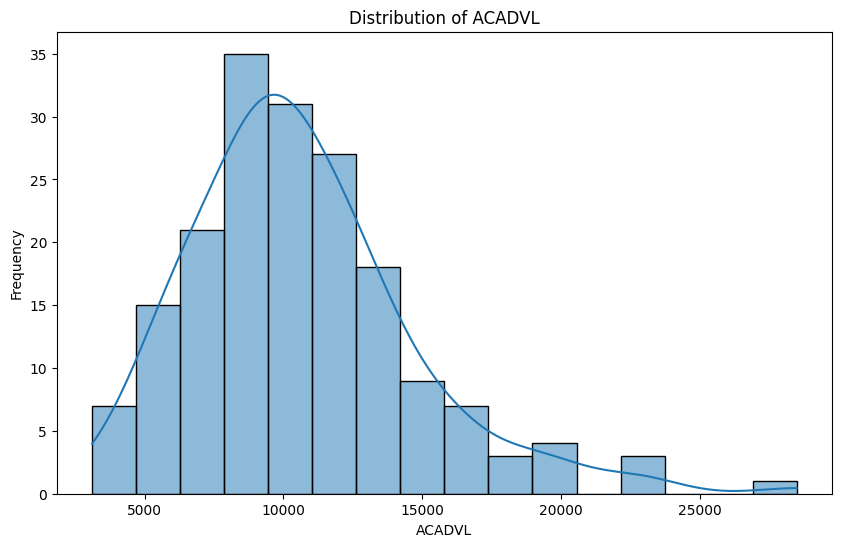

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# sample first 3 gene expression (features) for visualization
sample_features = filtered_df.columns[100:103]

# plots for distribution of selected features
for feature in sample_features:
    plt.figure(figsize=(10, 6))
    sns.histplot(filtered_df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

- From these charts we can see the data are not normally distributed, needed to be normalized

In [26]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
lab = LabelEncoder()

df = pd.read_csv('/kaggle/working/AML.csv')
df['SUBTYPES'] = lab.fit_transform(df['SUBTYPES'])

df.head()

,ID_REF,SUBTYPES,A2M,A2M-AS1,A2ML1,AACSP1,AADAC,AADACP1,AAGAB,AAK1,...,ZSCAN23,ZSCAN30,ZSCAN4,ZSCAN5A,ZSCAN9,ZSWIM2,ZW10,ZWINT,ZYX,hsa-let-7a-3
0,GSM1682614,2,624.0000,565.4000,319.150000,122.00000,42.30000,133.20000,1665.8500,3243.25000,...,224.800000,232.600000,40.700000,32.00000,766.3000,12.40000,3176.100,15749.800,6048.300,53.10000
1,GSM1682615,2,304.3068,1830.8620,180.760200,29.77288,19.57422,16.81159,1073.9378,955.75520,...,265.609050,461.835233,287.470500,21.22742,982.4437,6.70331,2215.543,8534.358,4854.398,19.03580
2,GSM1682616,3,463.7667,435.2649,109.134580,175.72920,170.30440,46.75180,1073.1912,3872.55975,...,92.529765,331.697060,106.360175,50.70005,1743.9510,8.50921,2248.957,8522.965,9705.064,55.37656
3,GSM1682617,2,352.3943,3821.8520,93.762615,22.78340,89.42802,96.05951,1046.8060,3127.73030,...,125.734465,455.775400,26.124795,63.00554,678.2092,11.66550,3923.253,8376.515,5949.995,26.36266
4,GSM1682618,6,388.0160,388.3800,326.465700,27.50754,43.43768,7.19693,1452.0909,6702.01330,...,236.682150,231.958157,19.562850,23.93678,663.8115,20.07734,2700.176,9423.422,10205.880,48.58318


In [27]:
import numpy as np

# Statistical Analysis & Machine Learning Packages/Libraries 
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE # <--- Recursive Feature Eliminator
from sklearn.tree import DecisionTreeClassifier
from scipy.stats import pearsonr # <--- Pearson Correlation
from sklearn.feature_selection import SelectKBest, chi2 # <--- Chi-Squared Test
from sklearn.feature_selection import SelectKBest, f_classif # <--- Analysis of Variance
from sklearn.ensemble import RandomForestClassifier # <--- Random Forest Regressor
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score, f1_score
from sklearn.svm import SVC # <--  Support Vector Machine
import xgboost as xgb # <--  XGBoost
from sklearn.metrics import mean_squared_error
import sklearn.neighbors # <--- k-Nearest Neighbors
from sklearn.feature_selection import mutual_info_classif
from sklearn.neural_network import MLPClassifier # <--- Multi-Layer Perceptron
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from scipy.stats import uniform, randint
import sklearn.ensemble # <--- Soft Voting Machine
from sklearn.metrics import confusion_matrix

# Data Visualization Packages/Libraries 
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from sklearn.tree import plot_tree

# Miscellaneous Packages/Libraries 
import warnings
# from biothings_client import get_client
from sklearn.exceptions import ConvergenceWarning

# Hardcoded Values
random_state = 42 # <--- Random State
test_size = 0.3 # <--- Test/Train Split

kfold = KFold(n_splits = 6, shuffle = True, random_state = random_state) # <--- KFold
warnings.filterwarnings("ignore", category = ConvergenceWarning) # <--- Supress Warnings

In [29]:
# Feature Selection 
y = df['SUBTYPES'] # <--- Target (Case/Control)
x = df.drop(['SUBTYPES', 'ID_REF'], axis = 1) # <--- Features (Genomic/Clinical)
print(x.shape, y.shape)

(181, 10130) (181,)


In [30]:
# normalization
# log
x_log_transformed = np.log1p(x) 
x_bc_train, x_bc_test, y_bc_train, y_bc_test = train_test_split(x_log_transformed, y, test_size = test_size, random_state = random_state) # <-- Test/Train

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


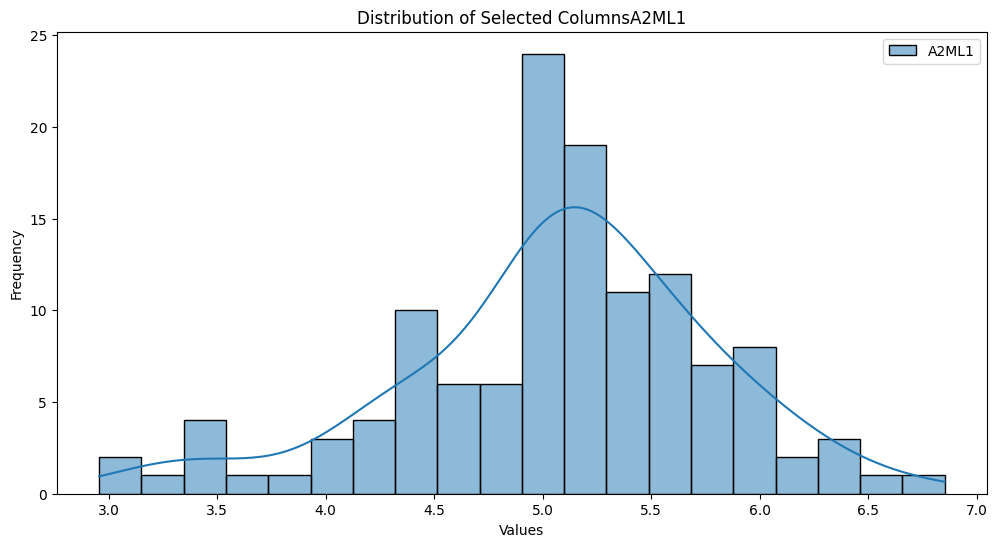

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


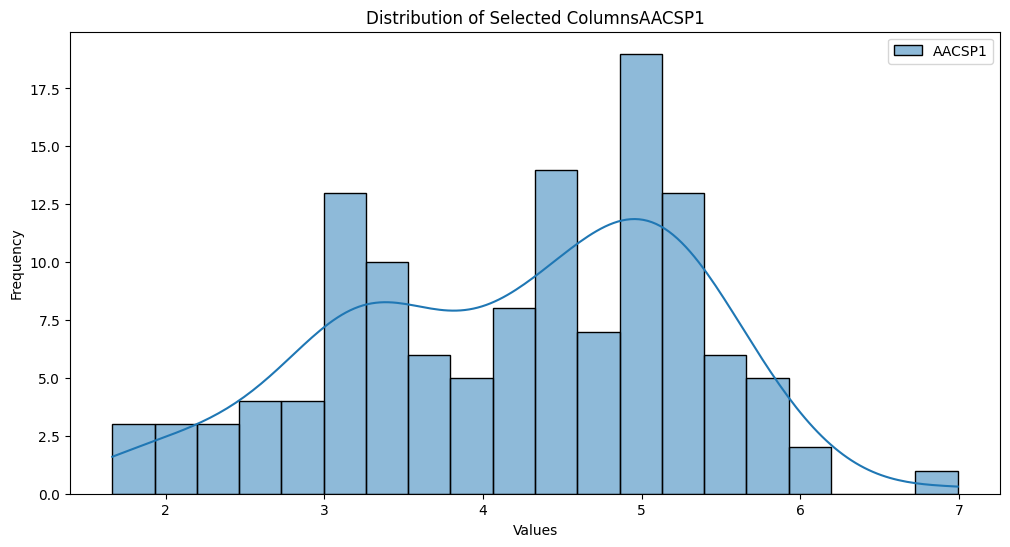

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


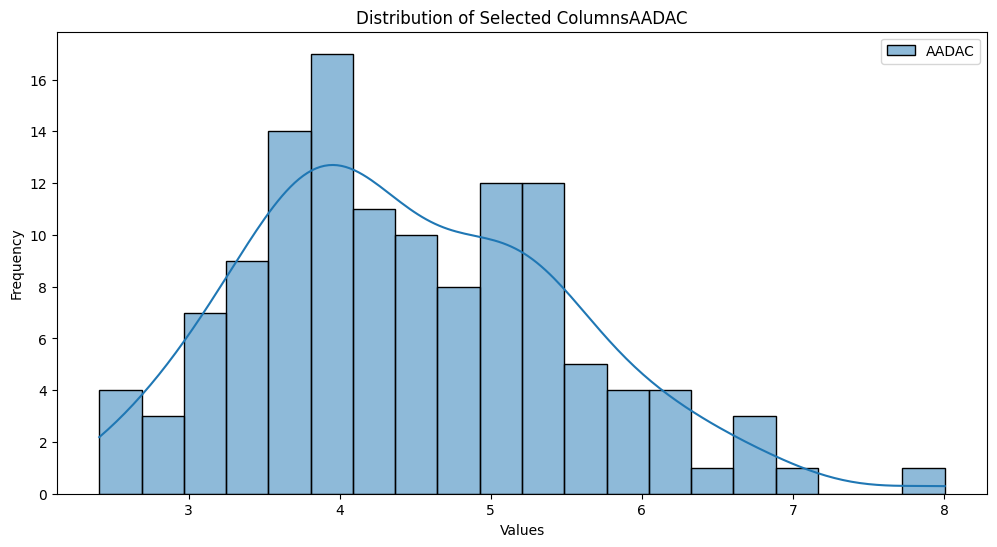

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming x is your DataFrame

# Select a subset of columns for visualization
subset_cols = x_bc_train.columns[2:5]  
# Create histograms for the selected columns

for col in subset_cols:
    plt.figure(figsize=(12, 6))
    sns.histplot(x_bc_train[col], kde=True, bins=20, label=col)

    plt.title('Distribution of Selected Columns{}'.format(col))
    plt.xlabel('Values')
    plt.ylabel('Frequency')
    plt.legend()
    plt.savefig('Distribution{}.png'.format(col))
    plt.show()


In [32]:
# Analysis of Variance
anova_features = SelectKBest(score_func = f_classif, k = 8).fit(x_log_transformed, y) # <--- Select 10 Features

anova_scores = pd.DataFrame(anova_features.scores_, columns=['F-Statistic']) # <--- Scores
anova_pvalues = pd.DataFrame(anova_features.pvalues_, columns=['p-value']) # <--- p-values
anova_labels = pd.DataFrame(x_log_transformed.columns, columns=['Gene_Name']) # Features

anova_df = pd.concat([anova_labels, anova_scores, anova_pvalues], axis = 1) # <--- Create Table
anova_df_sorted = anova_df.sort_values('F-Statistic', ascending = False) # <--- Sort Table
anova_df_significant = anova_df_sorted[anova_df_sorted['p-value'] < 0.05] # <--- Significance Filter 

anova_df_significant # <--- Display Table

,Gene_Name,F-Statistic,p-value
547,ARHGAP4,36.269863,3.475945e-33
438,ANXA8,28.306808,8.981453e-28
5835,MAP7,26.412348,2.305631e-26
6529,NRIP1,24.137751,1.338395e-24
7211,PRDX4,22.916157,1.283356e-23
...,...,...,...
1000,BIVM,1.994609,4.974869e-02
4260,KPNA5,1.994486,4.976385e-02
1483,CCNT2,1.994048,4.981796e-02
3928,INO80C,1.993904,4.983581e-02


In [33]:
anova_df_significant_feature = anova_df_significant['Gene_Name'].tolist()

In [34]:
x_log_transformed.shape

merged_table = pd.concat([x_log_transformed[anova_df_significant_feature], df['SUBTYPES']], axis=1)

merged_table.head()

,ARHGAP4,ANXA8,MAP7,NRIP1,PRDX4,AP1S2,SKAP2,SAMHD1,FGF13,CD1D,...,SSPN,GS1-124K5.11,KLF9,RUNX1T1,BIVM,KPNA5,CCNT2,INO80C,LOC101927660,SUBTYPES
0,7.865111,6.164682,8.011372,9.098117,8.870480,8.821091,8.802725,8.193437,5.431974,7.345236,...,4.945207,4.730039,5.985866,4.566429,5.874369,6.990257,8.288685,6.855725,3.650658,2
1,8.019498,4.900145,8.580856,10.507728,8.236470,8.163552,8.588778,5.996872,3.991456,5.426813,...,5.235815,3.111518,7.552049,4.175618,6.198693,6.738842,8.462616,6.283170,4.087330,2
2,8.280189,3.948811,8.073347,8.903439,8.107875,8.775625,9.076820,6.602431,4.197915,5.915923,...,3.913420,6.179228,5.042943,4.630102,4.695851,6.015056,7.943385,6.247200,2.903443,3
3,7.768417,5.396187,8.931311,10.999185,8.668729,8.095420,8.880218,7.375057,5.342201,7.427183,...,4.865683,5.508889,6.183509,4.087332,5.782437,6.507005,8.258505,6.476962,5.182655,2
4,8.255037,5.588147,6.580637,8.307305,8.994947,9.407541,9.852740,9.009985,5.552255,8.876306,...,3.096020,6.375625,6.262717,5.036992,5.140979,5.959878,7.866745,6.675743,3.664212,6


In [35]:
import numpy as np

num_classes = 8  # Number of classes in y

# Calculate mean expression levels for each feature across the different classes
mean_expression_per_feature = merged_table.groupby(merged_table['SUBTYPES']).mean()
mean_expression_per_feature

,ARHGAP4,ANXA8,MAP7,NRIP1,PRDX4,AP1S2,SKAP2,SAMHD1,FGF13,CD1D,...,KIF22,SSPN,GS1-124K5.11,KLF9,RUNX1T1,BIVM,KPNA5,CCNT2,INO80C,LOC101927660
SUBTYPES,,,,,,,,,,,,,,,,,,,,,
0,7.945485,6.608270,9.228224,5.493473,8.229671,8.002761,8.595033,6.345402,5.678465,5.931184,...,7.016879,5.160969,5.172187,5.951163,5.670455,5.707774,7.553654,8.520926,7.582025,3.899950
1,7.888396,5.428064,8.262696,10.180782,8.741884,8.459082,8.740451,7.006808,5.499563,6.655644,...,7.316764,4.825076,5.596431,6.569562,4.263340,5.552602,6.707060,8.406470,6.471105,3.091350
2,7.965615,5.553235,8.031968,9.212543,8.716256,8.488901,8.946198,7.168125,4.895894,6.426329,...,7.553850,4.927328,5.429949,6.391755,4.706087,5.393936,6.573505,8.055556,6.596103,3.550716
3,7.901878,5.671251,7.830438,9.311752,8.873226,8.393889,8.919101,7.394857,5.402079,6.527620,...,7.500661,4.924500,5.222069,6.242465,5.297360,5.474869,6.430086,8.043864,6.573806,4.103818
4,6.200094,8.379684,5.419128,7.162272,7.164680,7.500794,6.727491,6.708200,8.582335,6.039846,...,7.580468,4.869025,5.091714,6.660207,4.772892,5.353901,6.551899,8.028342,6.784027,3.773732
5,8.024537,5.931819,7.284878,9.049805,8.756969,9.392985,9.049745,8.670105,4.922611,8.524955,...,7.572779,4.760115,5.699491,6.494809,4.723723,5.080694,6.246600,7.991958,6.419644,3.890417
6,8.024016,5.838447,6.455329,8.537676,8.848844,9.391968,8.926453,9.057699,4.861011,9.043624,...,7.611495,4.431052,5.615180,6.955106,4.659051,4.859190,6.271078,7.866648,6.516198,3.660204
7,7.424247,5.921438,8.278750,9.550653,9.679262,8.294252,7.879051,7.420479,5.931523,7.286771,...,7.807946,5.014606,4.269210,7.050702,5.549764,5.355143,6.561516,7.942810,6.411598,4.666325
8,7.222744,5.785651,9.081478,10.016921,9.781045,8.494726,8.520004,7.423661,5.021021,7.847503,...,7.676108,5.727026,5.010007,6.801257,6.220426,5.354693,6.674821,8.061639,6.612954,4.823643


In [36]:
# Compute fold change for each feature across each pair of classes
fold_change_per_feature = np.zeros(mean_expression_per_feature.shape[1])  # Initialize fold change array

for i in range(num_classes):
    for j in range(i + 1, num_classes):
        # Compute fold change between class i and class j
        fold_change_ij = np.abs(mean_expression_per_feature.iloc[i] / mean_expression_per_feature.iloc[j])
        fold_change_per_feature = np.maximum(fold_change_per_feature, fold_change_ij)

In [37]:
# Optionally, you can filter out features based on a fold change threshold
fold_change_threshold = 1 # Adjust this threshold as needed
significant_features_indices = np.where(fold_change_per_feature > fold_change_threshold)[0]

# Filter out significant features from the original dataframe_x
significant_features = merged_table.iloc[:, significant_features_indices]

significant_features

,ARHGAP4,ANXA8,MAP7,NRIP1,PRDX4,AP1S2,SKAP2,SAMHD1,FGF13,CD1D,...,KIF22,SSPN,GS1-124K5.11,KLF9,RUNX1T1,BIVM,KPNA5,CCNT2,INO80C,LOC101927660
0,7.865111,6.164682,8.011372,9.098117,8.870480,8.821091,8.802725,8.193437,5.431974,7.345236,...,7.825645,4.945207,4.730039,5.985866,4.566429,5.874369,6.990257,8.288685,6.855725,3.650658
1,8.019498,4.900145,8.580856,10.507728,8.236470,8.163552,8.588778,5.996872,3.991456,5.426813,...,7.478616,5.235815,3.111518,7.552049,4.175618,6.198693,6.738842,8.462616,6.283170,4.087330
2,8.280189,3.948811,8.073347,8.903439,8.107875,8.775625,9.076820,6.602431,4.197915,5.915923,...,7.710878,3.913420,6.179228,5.042943,4.630102,4.695851,6.015056,7.943385,6.247200,2.903443
3,7.768417,5.396187,8.931311,10.999185,8.668729,8.095420,8.880218,7.375057,5.342201,7.427183,...,7.477001,4.865683,5.508889,6.183509,4.087332,5.782437,6.507005,8.258505,6.476962,5.182655
4,8.255037,5.588147,6.580637,8.307305,8.994947,9.407541,9.852740,9.009985,5.552255,8.876306,...,7.812625,3.096020,6.375625,6.262717,5.036992,5.140979,5.959878,7.866745,6.675743,3.664212
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176,7.744873,5.924523,6.868910,8.835531,8.891181,8.736513,9.392812,8.323835,4.777441,7.062534,...,7.547713,4.589380,5.940434,4.694706,4.814080,5.583120,6.849702,8.005033,5.940171,4.859037
177,7.510814,6.468320,8.337684,9.341588,7.298445,8.051452,9.086312,7.734501,4.628887,6.557062,...,7.206081,5.633479,3.970292,6.200780,5.104935,5.024538,7.253046,8.750746,7.094152,3.650658
178,7.102088,6.124136,8.178891,9.126372,9.649743,8.421860,7.480710,7.601502,5.772375,6.868910,...,8.077323,4.484508,4.342506,7.346182,5.560040,5.568726,6.091988,7.688364,6.163315,4.114147
179,5.771753,8.384907,4.937347,8.430502,7.975840,7.162514,6.353848,7.172041,7.556585,6.365439,...,7.914618,5.977788,4.812997,7.234850,5.440251,3.939638,7.110859,7.781890,7.788750,5.531015


In [38]:
most_significant_feature = significant_features.columns.tolist()

In [39]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
import pandas as pd

# Assuming df is your dataframe with micro-RNA genes and labels
# Separate features (X) and labels (y)
X = merged_table.drop('SUBTYPES', axis=1)  # Assuming 'label' is the column name for the target variable
y = df['SUBTYPES']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Random Forest classifier
clf = RandomForestClassifier(n_estimators=50, random_state=42)

# Fit classifier to the training data
clf.fit(X_train, y_train)

# Use feature importances for feature selection
feature_importances = pd.Series(clf.feature_importances_, index=X.columns)

# Select features with importance greater than the mean importance
selected_features = feature_importances[feature_importances > feature_importances.mean()].index.tolist()

# Subset dataframe with selected features
df_selected = df[selected_features]

# Print selected features
print("Selected Features:", len(selected_features))

Selected Features: 938


In [40]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler
import numpy as np

# Assuming you have already loaded your data into variables x and y

# Split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x_log_transformed[selected_features], y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# L1 regularization (Lasso)
l1_model = LogisticRegression(penalty='l1', solver='liblinear', multi_class='ovr')
l1_model.fit(x_train_scaled, y_train)

# Select features using L1 regularization
sfm_l1 = SelectFromModel(l1_model, prefit=True)
x_train_l1 = sfm_l1.transform(x_train_scaled)
x_test_l1 = sfm_l1.transform(x_test_scaled)

# L2 regularization (Ridge)
l2_model = LogisticRegression(penalty='l2', solver='lbfgs', multi_class='ovr')
l2_model.fit(x_train_scaled, y_train)

# Select features using L2 regularization
sfm_l2 = SelectFromModel(l2_model, prefit=True)
x_train_l2 = sfm_l2.transform(x_train_scaled)
x_test_l2 = sfm_l2.transform(x_test_scaled)

# Check the selected features
selected_features_l1 = sfm_l1.get_support(indices=True)
selected_features_l2 = sfm_l2.get_support(indices=True)

# print("Selected features using L1 regularization:", selected_features_l1)
# print("Selected features using L2 regularization:", selected_features_l2)

# Now you can train your model using the selected features
# For example, you can use the transformed data x_train_l1, x_test_l1, x_train_l2, x_test_l2
# with your preferred classifier
# Get selected feature names using L1 regularization
# Get selected feature names using L1 regularization
selected_features_l1 = [selected_features[i] for i in sfm_l1.get_support(indices=True)]
print("Selected features using L1 regularization:", len(selected_features_l1))
# Get selected feature names using L2 regularization
selected_features_l2 = [selected_features[i] for i in sfm_l2.get_support(indices=True)]
print("Selected features using L2 regularization:", len(selected_features_l2))

Selected features using L1 regularization: 262
Selected features using L2 regularization: 410


In [118]:
# splitting selected_features_l2
X_train, X_test, y_train, y_test = train_test_split(x_log_transformed[selected_features_l2], y, test_size=0.2, random_state=42)

In [121]:
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier  # Or another classifier of your choice

estimator = RandomForestClassifier(random_state=42)  # Adjust estimator as needed
cv = StratifiedKFold(n_splits=5)
selector_rfecv = RFECV(estimator, step=10, cv=cv, scoring='accuracy')  # Adjust scoring as needed
selector_rfecv.fit(X_train, y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


RFECV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
      estimator=RandomForestClassifier(random_state=42), scoring='accuracy',
      step=10)

In [122]:
# Select features based on RFECV
X_= x_log_transformed[selected_features_l2].iloc[:, selector_rfecv.support_]
X_

,ARHGAP4,NRIP1,CD300LF,PTPRCAP,ITM2A,CLTCL1,NDST2,UNC119,SSBP2,CX3CR1,...,KIAA1456,ARID2,NUDCD2,LINC01296,ALPL,F12,LRRN4,TNRC6A,CNTLN,LOC101927660
0,7.865111,9.098117,8.973567,7.997360,8.343149,7.736831,7.479751,5.737217,7.714320,9.894522,...,5.456602,8.528726,4.065602,5.910526,5.549076,7.120929,5.198773,6.270799,6.162683,3.650658
1,8.019498,10.507728,7.824696,8.721893,9.804712,4.811504,7.254265,6.562074,9.174931,5.873892,...,3.690781,8.903398,4.884941,5.136018,4.301189,7.224801,2.699753,6.549662,6.282540,4.087330
2,8.280189,8.903439,8.986801,8.511789,10.058314,4.186649,7.308848,6.604265,8.892222,6.144883,...,5.435648,8.994001,6.432549,4.985064,3.488047,6.549679,4.623474,6.133632,6.610108,2.903443
3,7.768417,10.999185,8.810791,9.258568,9.574438,6.364653,7.478353,6.428592,8.005257,8.880257,...,3.626984,8.549343,5.911133,6.830098,4.824417,7.447737,5.236410,5.555417,7.070660,5.182655
4,8.255037,8.307305,9.784996,6.394445,6.832075,8.401684,7.661886,7.659585,7.526789,10.469775,...,3.058891,8.937714,6.234859,7.546249,3.720302,7.116280,3.345470,6.257707,6.723099,3.664212
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176,7.744873,8.835531,8.484277,8.571303,10.384895,5.647917,7.001291,5.877456,8.927367,7.990526,...,6.028519,8.380365,5.276583,5.751620,2.646175,6.573959,4.312811,5.508173,6.983975,4.859037
177,7.510814,9.341588,8.249680,8.516613,7.850357,6.202738,7.023625,4.951593,8.678121,8.284681,...,5.532994,8.471212,4.114147,7.636414,4.814620,4.477337,5.470168,5.986954,5.847305,3.650658
178,7.102088,9.126372,7.839683,7.631674,8.850123,4.543295,6.791390,6.038110,6.995995,9.294672,...,5.882765,7.715168,4.065602,4.291828,3.793239,4.206184,6.084727,6.716837,6.127524,4.114147
179,5.771753,8.430502,7.126328,9.266135,8.979272,7.814400,7.972449,5.073297,8.490993,8.517573,...,7.203480,8.985458,5.537728,5.787204,5.490177,6.160785,6.300419,7.005245,5.918087,5.531015


In [123]:
# Assuming 'selector_rfecv' is your RFECV fitted object
# and 'X_train' contains the feature names as columns

# Get the boolean mask of selected features
selected_features_mask = selector_rfecv.support_

# Apply this mask to the columns of your DataFrame to get the names of selected features
selected_features_names = X_train.columns[selected_features_mask]

print("Selected Features:")
print(selected_features_names)

Selected Features:
Index(['ARHGAP4', 'NRIP1', 'CD300LF', 'PTPRCAP', 'ITM2A', 'CLTCL1', 'NDST2',
       'UNC119', 'SSBP2', 'CX3CR1',
       ...
       'KIAA1456', 'ARID2', 'NUDCD2', 'LINC01296', 'ALPL', 'F12', 'LRRN4',
       'TNRC6A', 'CNTLN', 'LOC101927660'],
      dtype='object', length=210)


In [124]:
biomarker = df[selected_features_names]

In [125]:
# converting numpy array to list
columns_needed = selected_features + ['SUBTYPES']

In [53]:
merged_table[columns_needed].to_csv('April10_biomarker.csv')

In [126]:
df2 = merged_table[columns_needed]
df2[selected_features_names].head()

,ARHGAP4,NRIP1,CD300LF,PTPRCAP,ITM2A,CLTCL1,NDST2,UNC119,SSBP2,CX3CR1,...,KIAA1456,ARID2,NUDCD2,LINC01296,ALPL,F12,LRRN4,TNRC6A,CNTLN,LOC101927660
0,7.865111,9.098117,8.973567,7.997360,8.343149,7.736831,7.479751,5.737217,7.714320,9.894522,...,5.456602,8.528726,4.065602,5.910526,5.549076,7.120929,5.198773,6.270799,6.162683,3.650658
1,8.019498,10.507728,7.824696,8.721893,9.804712,4.811504,7.254265,6.562074,9.174931,5.873892,...,3.690781,8.903398,4.884941,5.136018,4.301189,7.224801,2.699753,6.549662,6.282540,4.087330
2,8.280189,8.903439,8.986801,8.511789,10.058314,4.186649,7.308848,6.604265,8.892222,6.144883,...,5.435648,8.994001,6.432549,4.985064,3.488047,6.549679,4.623474,6.133632,6.610108,2.903443
3,7.768417,10.999185,8.810791,9.258568,9.574438,6.364653,7.478353,6.428592,8.005257,8.880257,...,3.626984,8.549343,5.911133,6.830098,4.824417,7.447737,5.236410,5.555417,7.070660,5.182655
4,8.255037,8.307305,9.784996,6.394445,6.832075,8.401684,7.661886,7.659585,7.526789,10.469775,...,3.058891,8.937714,6.234859,7.546249,3.720302,7.116280,3.345470,6.257707,6.723099,3.664212


/opt/conda/lib/python3.10/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


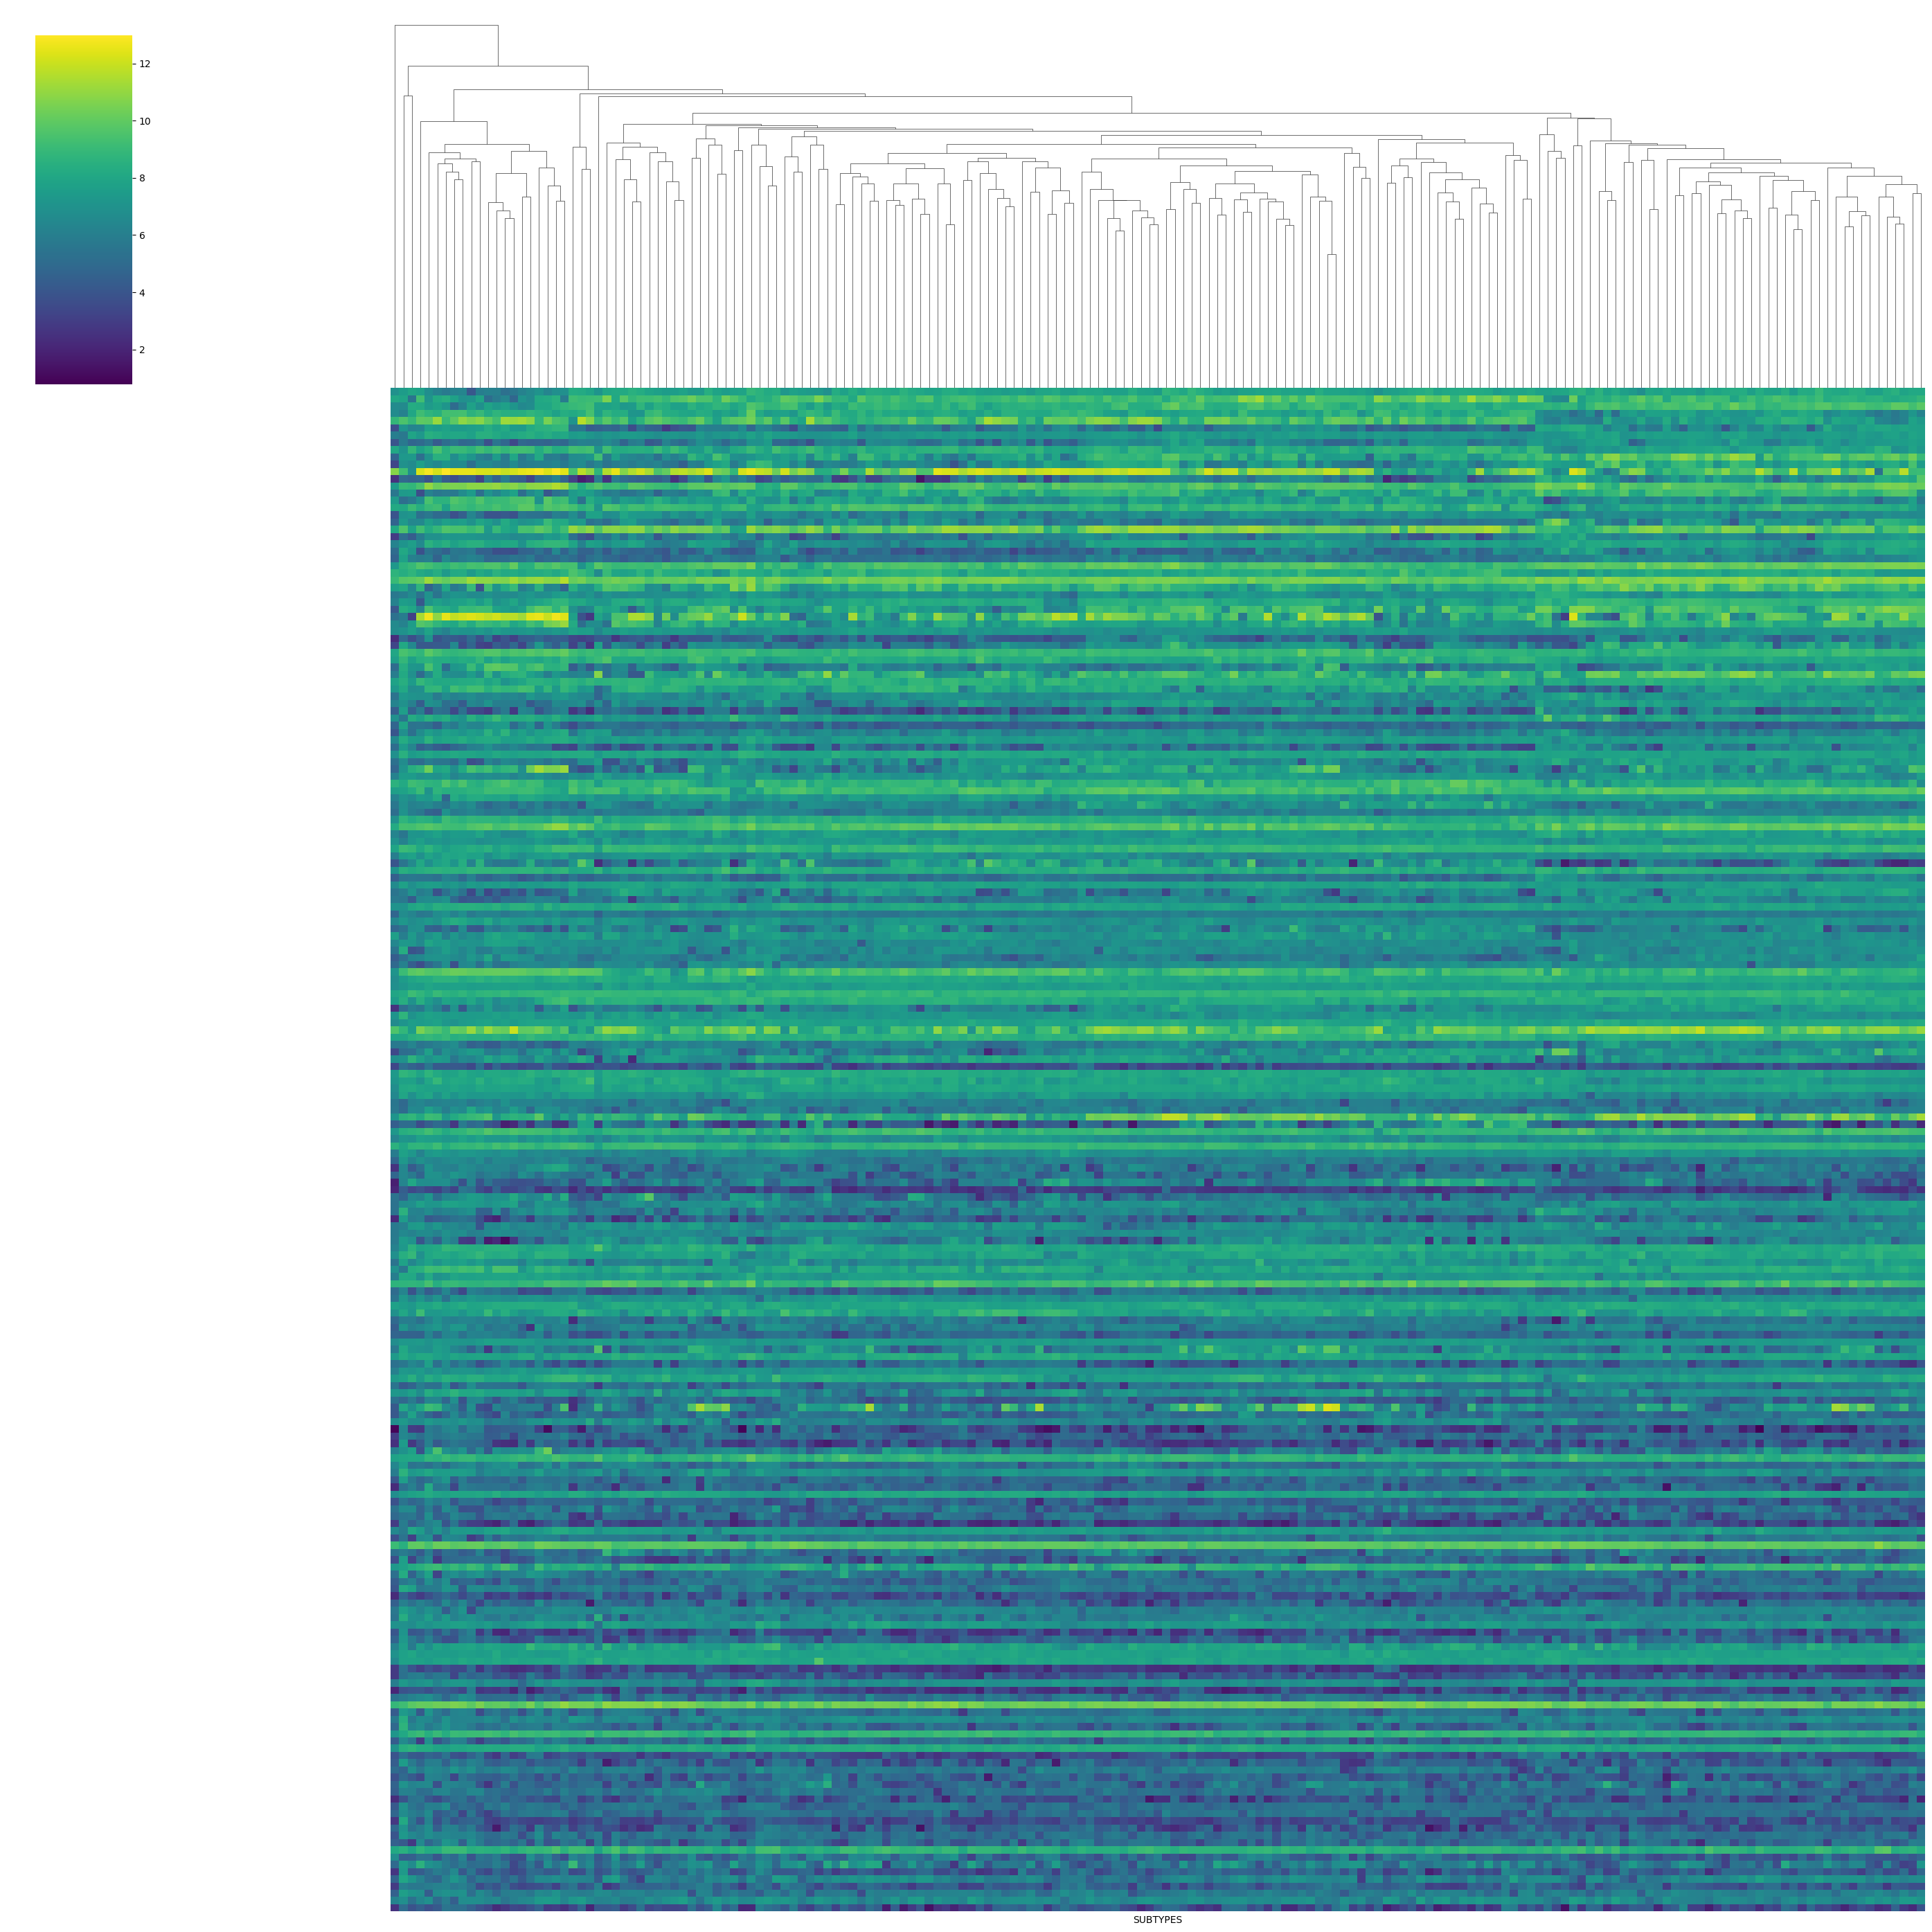

In [127]:
filtered_df = df2[selected_features_names].set_index(df['SUBTYPES']).transpose()

# Using clustermap to show subtypes as a color-annotated row
sns.clustermap(filtered_df, figsize=(28, 28), 
               row_cluster=False, # Avoid clustering genes if you want them in the original order
               col_cluster=True,  # Cluster samples if desired
               cmap="viridis",    # Color map
               yticklabels=False,  # Show gene names
               xticklabels=False, # Hide sample names for clarity
               )
plt.savefig('clustermap to show subtypes.png')
plt.show()


In [128]:
# ML/AI Analysis
y = df['SUBTYPES'] # <--- Target (Case/Control)

x_biomarker_train, x_biomarker_test, y_biomarker_train, y_biomarker_test = train_test_split(df2[selected_features_names], y, test_size = test_size, random_state = random_state) # <--  Test/Train

x_biomarker_train.head()

,ARHGAP4,NRIP1,CD300LF,PTPRCAP,ITM2A,CLTCL1,NDST2,UNC119,SSBP2,CX3CR1,...,KIAA1456,ARID2,NUDCD2,LINC01296,ALPL,F12,LRRN4,TNRC6A,CNTLN,LOC101927660
85,6.992372,10.839894,8.764163,9.331859,8.625043,4.685828,7.588931,6.752154,8.688858,8.220672,...,6.456456,8.787587,4.613138,6.090857,4.961445,6.866204,4.639572,5.787511,5.669536,4.806477
152,7.870510,9.315907,8.075023,9.094851,9.941200,4.833102,6.996819,5.031744,9.002227,7.779174,...,4.009150,8.757155,6.588376,7.037994,3.808882,6.572143,5.824967,4.207673,7.045689,6.414606
82,8.240461,7.909215,10.177050,7.031607,7.194146,6.172678,7.714871,8.310187,7.064309,11.242874,...,3.487074,8.835878,5.075612,5.461412,5.010635,6.806294,3.860554,5.885003,6.671588,3.039872
147,8.650907,7.621502,7.759057,5.977384,6.028266,8.503143,7.988408,7.202486,7.091168,7.927385,...,3.567793,9.324771,3.767209,5.182158,5.277249,3.311617,2.978378,5.851510,7.318980,2.686993
26,7.843485,8.717272,8.338403,8.399277,11.183399,4.377906,6.821930,6.239669,8.739990,9.083988,...,5.758450,9.072661,4.006912,6.495161,4.941282,4.563537,5.600179,5.011597,7.125081,2.205971


In [129]:
# Random Forest Classifier (with Hyperparameter Tuning)
rf = RandomForestClassifier(random_state = 42) # <--- Initialize RF 
rf.fit(x_biomarker_train, y_biomarker_train) # <--- Fit RF
rf_parameter_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_features': ['sqrt', 'log2'],  # Number of features to consider at every split
    'max_depth': [None, 10, 20],  # Maximum number of levels in tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4]  # Minimum number of samples required at each leaf node
}

kfold = KFold(n_splits = 2 , shuffle = True, random_state = random_state) # <--- KFold

rf_best = GridSearchCV(
    rf, param_grid = rf_parameter_grid, cv = kfold,
    scoring = 'accuracy', n_jobs = -1, verbose = 0
) # <--- Hyperparameter Tuning 

rf_best.fit(x_biomarker_train, y_biomarker_train) # <--- Fit GridSearchCV
rf_best = rf_best.best_estimator_ # <--- Assign Best Estimator 
rf_best

RandomForestClassifier(random_state=42)

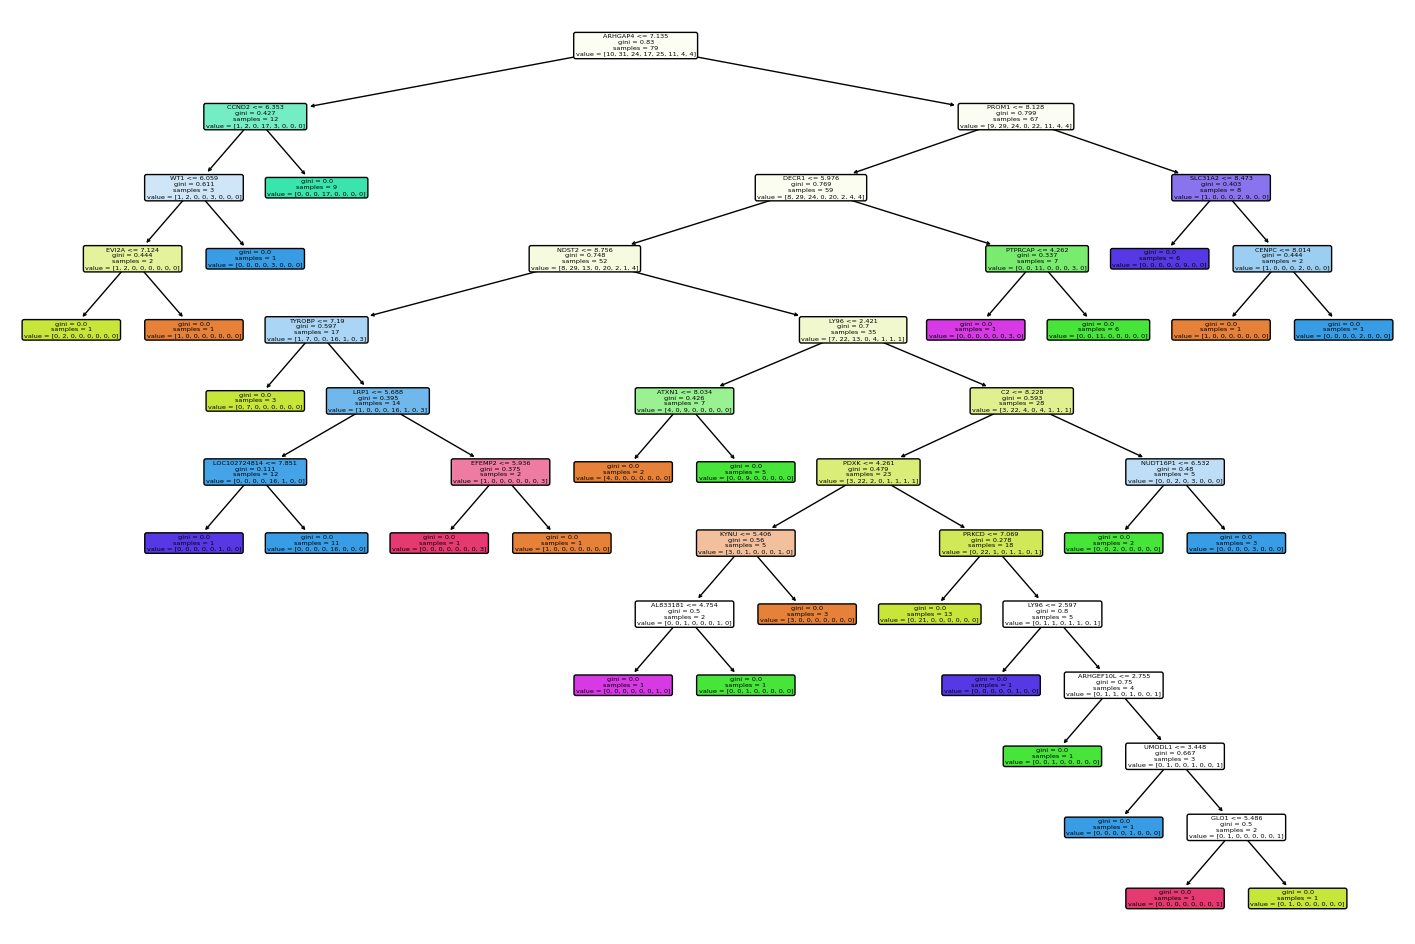

In [130]:
# Figure). Random Forest 
best_tree_index = np.argmax([tree.tree_.max_depth for tree in rf_best.estimators_])
best_tree = rf_best.estimators_[best_tree_index]

plt.figure(figsize=(18,12)) # <--- Figure Size
plot_tree(best_tree, filled=True, feature_names=selected_features, class_names=None, rounded=True) # <--- Best Tree
plt.savefig('random forest best tree.png')
plt.show() # <--- Display Figure

In [131]:
y_predict = rf_best.predict(x_biomarker_test)  # <--- Predict Target
rf_accuracy = accuracy_score(y_biomarker_test, y_predict)  # <--- Calculate Accuracy

In [132]:
y_probs = rf_best.predict_proba(x_biomarker_test)
y_probs = y_probs[:, 1]  # <--- Predict Positives Classes

rf_F1 = f1_score(y_biomarker_test, y_predict, average='weighted')  # <--- Weigthed-Average F1 Score

from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelBinarizer

# Convert y_predict to one-hot encoding
lb = LabelBinarizer()
y_one_hot = lb.fit_transform(y_predict)

# Compute ROC AUC score for each class
roc_auc_scores = []
for i in range(y_one_hot.shape[1]):
    roc_auc_scores.append(roc_auc_score(y_one_hot[:, i], y_probs))
# Average the ROC AUC scores across all classes
avg_roc_auc = sum(roc_auc_scores) / len(roc_auc_scores)


print('Accuracy: ', rf_accuracy)
print("Average ROC AUC Score:", avg_roc_auc)
print('Weighted-Average F1 Score: ', rf_F1)

Accuracy:  0.6909090909090909
Average ROC AUC Score: 0.3704590641087967
Weighted-Average F1 Score:  0.6606749311294767


In [133]:
# Support Vector Machine (with Hyperparameter Tuning)
svmc = SVC(kernel = 'linear', probability = True) # <--- Initialize SVM
svmc.fit(x_biomarker_train, y_biomarker_train) # <--- Fit SVM

svmc_parameter_grid = {
    "kernel": [ 'linear','rbf'],
    'gamma': [0.001, 0.01, 0.1, 1, 10],
    'C': [0.01, 0.1, 1, 10, 50, 100, 500, 1000, 5000, 10000]
} # <--- Generate Parameter Grid

svmc_best = GridSearchCV(
    svmc, param_grid = svmc_parameter_grid, cv = kfold, 
    scoring = 'accuracy', n_jobs = -1, verbose = 0
) # <--- Hyperparameter Tuning 

svmc_best.fit(x_biomarker_train, y_biomarker_train) # <--- Fit GridSearchCV
# Get the best estimator
best_svmc_estimator = svmc_best.best_estimator_

svmc_best = svmc_best.best_estimator_ # <--- Assign Best Estimator 
svmc_best

SVC(C=0.1, gamma=0.001, kernel='linear', probability=True)

In [134]:
y_predict = svmc_best.predict(x_biomarker_test) # <--- Predict Target
svmc_accuracy = accuracy_score(y_biomarker_test, y_predict) # <--- Calculate Accuracy

y_probs = svmc_best.predict_proba(x_biomarker_test)
y_probs = y_probs[:, 1] # <--- Predict Positives Classes
# Convert y_predict to one-hot encoding
lb = LabelBinarizer()
y_one_hot = lb.fit_transform(y_predict)
# Compute ROC AUC score for each class
svm_roc_auc_scores = []
for i in range(y_one_hot.shape[1]):
    roc_auc_scores.append(roc_auc_score(y_one_hot[:, i], y_probs))
# Average the ROC AUC scores across all classes
svmc_avg_roc_auc = sum(roc_auc_scores) / len(roc_auc_scores)

svmc_F1 = f1_score(y_biomarker_test, y_predict, average = 'weighted') # <--- Weigthed-Average F1 Score

print('Accuracy: ', svmc_accuracy)
print("Average ROC AUC Score:", svmc_avg_roc_auc)
print('Weighted-Average F1 Score: ', svmc_F1)

Accuracy:  0.7090909090909091
Average ROC AUC Score: 0.40104716133827484
Weighted-Average F1 Score:  0.6895373907138613


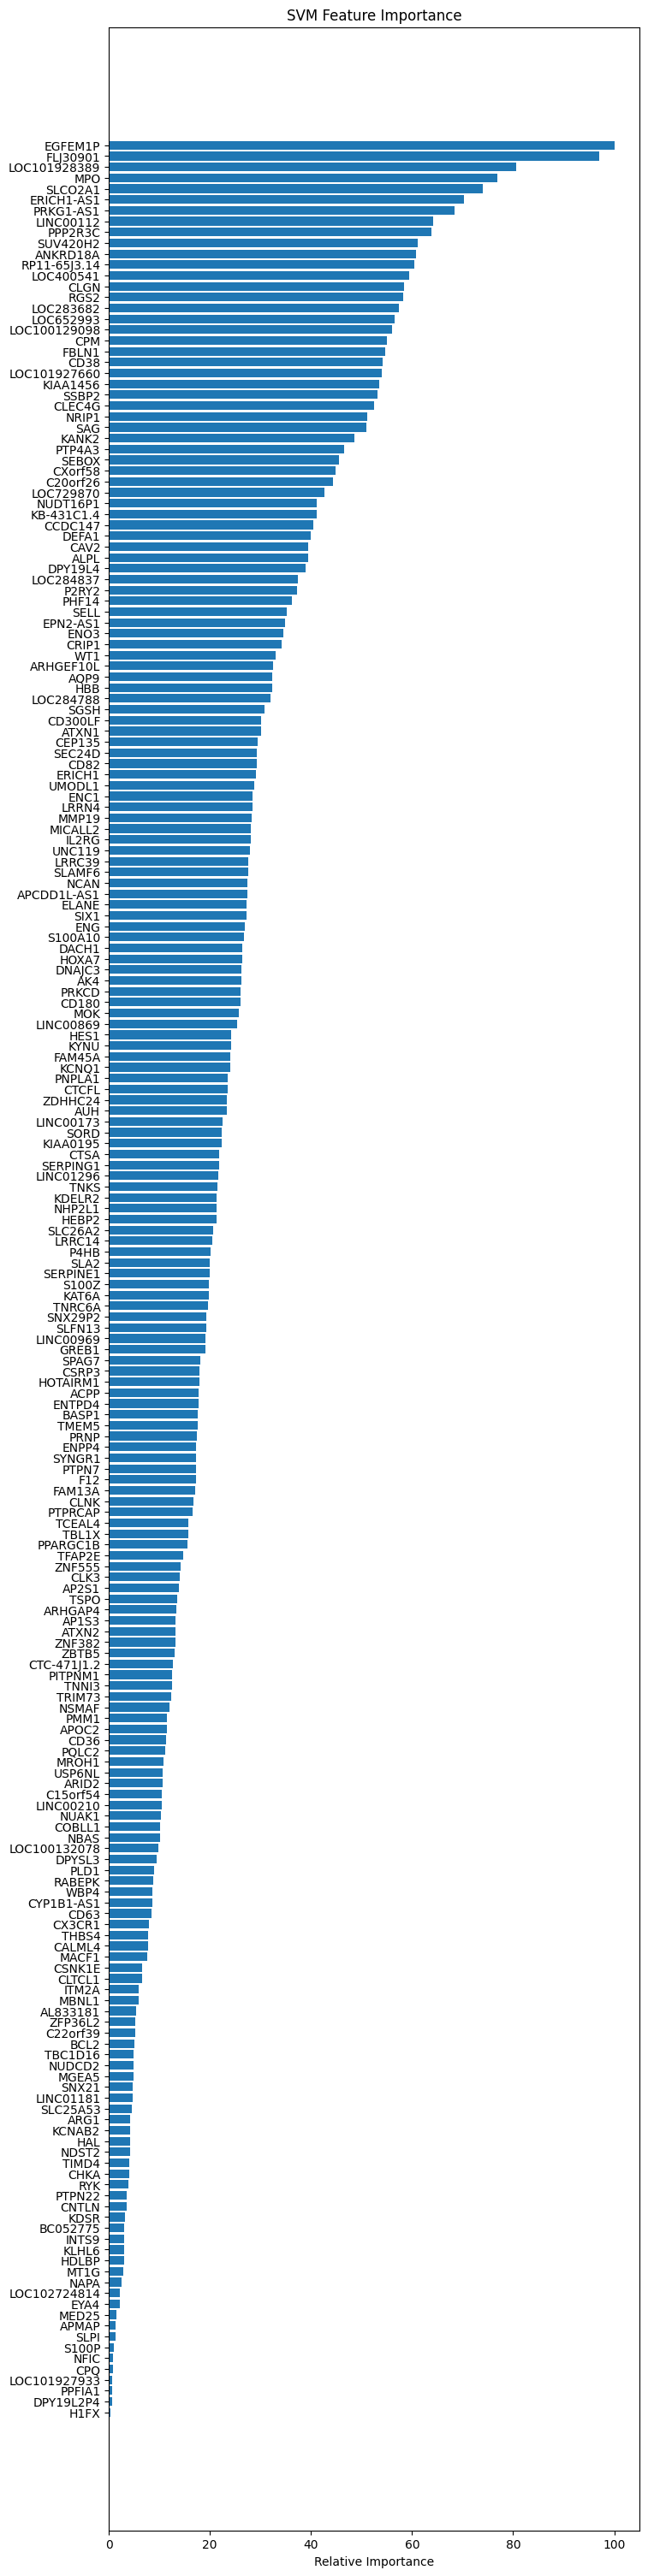

In [136]:
# Figure). Support Vector Machine
def plot_feature_importance(importance, names, model_type):
    feature_importance = np.abs(importance)
    feature_importance = 100.0 * (feature_importance / feature_importance.max())
    sorted_idx = np.argsort(feature_importance)
    pos = np.arange(sorted_idx.shape[0]) + 0.5
    plt.figure(figsize=(8, 38)) # <--- Figure Size
    plt.barh(pos, feature_importance[sorted_idx], align = 'center')
    plt.yticks(pos, np.array(names)[sorted_idx]) 
    plt.xlabel('Relative Importance')
    plt.title(model_type + ' Feature Importance') # <--- Axes
    plt.savefig(model_type + ' Feature Importance.png')
    plt.show()  #<--- Display Figure

def remove_feature(feature_importance, feature_names, feature_to_remove):
    filtered_importance = [imp for imp, name in zip(feature_importance, feature_names) if name != feature_to_remove]
    filtered_names = [name for name in feature_names if name != feature_to_remove]
    return np.array(filtered_importance), np.array(filtered_names)

if svmc_best.kernel == 'linear':
    importance = svmc_best.coef_[0]
    feature_names = x_biomarker_train.columns
    feature_to_remove = 'ID'
    filtered_importance, filtered_names = remove_feature(importance, feature_names, feature_to_remove)
    plot_feature_importance(filtered_importance, filtered_names, 'SVM')


In [137]:
# Soft Voting Classifier
classifiers = [
    ('rf', rf_best),
    ('svmc', svmc_best),
] # <-- Merge ML/AI Methods

voting_classifier = sklearn.ensemble.VotingClassifier(classifiers, voting = 'soft') 
voting_classifier.fit(x_biomarker_train, y_biomarker_train) 
voting_classifier

VotingClassifier(estimators=[('rf', RandomForestClassifier(random_state=42)),
                             ('svmc',
                              SVC(C=0.1, gamma=0.001, kernel='linear',
                                  probability=True))],
                 voting='soft')

In [138]:
y_predict = voting_classifier.predict(x_biomarker_test) # <--- Predict Target
voting_classifier = accuracy_score(y_biomarker_test, y_predict) # <--- Calculate Accuracy
voting_classifier

0.7454545454545455

Model Accuracy: 0.7454545454545455


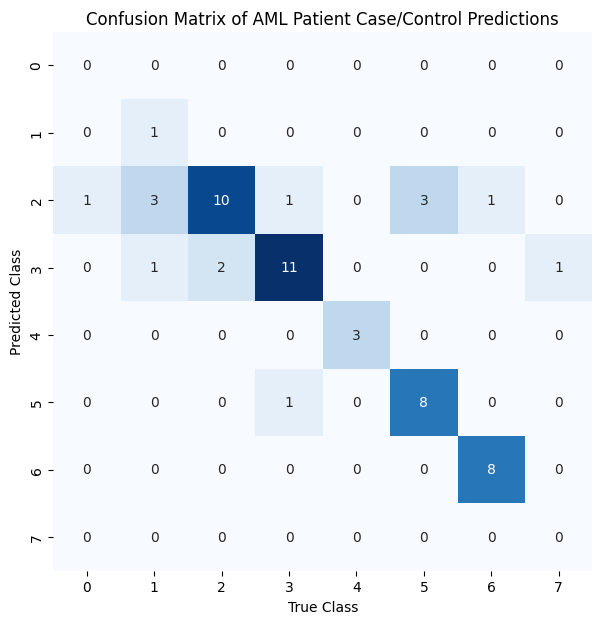

In [139]:
# Figure). Confusion Matrix
figure_size = (7, 7)
figure = plt.figure(figsize = figure_size) # <--- Figure Size

cm = confusion_matrix(y_biomarker_test, y_predict) # <--- Generate Confusion Matrix
ax = sns.heatmap(cm.T, square = True, annot = True, fmt = 'd', cbar = False, cmap='Blues')

figure_title = 'Confusion Matrix of AML Patient Case/Control Predictions'
plt.title(figure_title)  # <--- Figure Title
x_label = 'True Class'
plt.xlabel(x_label) # <--- Horizontal Axis Title
y_label = 'Predicted Class'
plt.ylabel(y_label) # <--- Vertical Axis Title

print(f'Model Accuracy: {voting_classifier}')
plt.savefig('Confusion Matrix.png')
plt.show() # <--- Display Figure

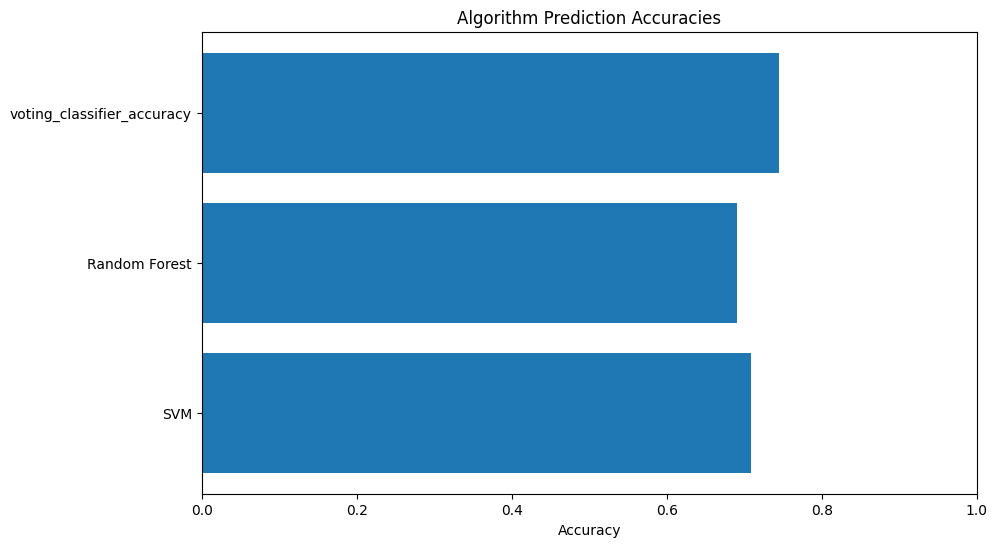

In [140]:
# Figure). Algorithm Accuracies

def plot_algorithm_accuracies(accuracies, algorithm_names, title = 'Algorithm Prediction Accuracies'):
    plt.figure(figsize=(10, 6))
    plt.barh(algorithm_names, accuracies, align = 'center')
    plt.xlabel('Accuracy')
    plt.xlim(0, 1)
    plt.title(title)
    plt.savefig('accuracy comparison.png')
    plt.show()

accuracies = [ 
              svmc_accuracy, 
              rf_accuracy,
             voting_classifier] # <--- Accuracy Variables
algorithms = [
              'SVM', 
              'Random Forest',
             'voting_classifier_accuracy'] # <--- Algorithms 

plot_algorithm_accuracies(accuracies, algorithms) # <--- Display Figure

In [144]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.preprocessing import LabelEncoder

# Assuming x_biomarker and y are your dataframes

# Convert dataframes to numpy arrays
x_np = df2[selected_features_names].to_numpy()
y_np = df['SUBTYPES'].to_numpy()

# Convert y to one-hot encoding
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y_np)
y_onehot = tf.keras.utils.to_categorical(y_encoded, num_classes=9)

# Split the data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x_np, y_onehot, test_size=0.2, random_state=42)

# Convert numpy arrays to tensors
x_train_tensor = tf.convert_to_tensor(x_train, dtype=tf.float32)
x_test_tensor = tf.convert_to_tensor(x_test, dtype=tf.float32)
y_train_tensor = tf.convert_to_tensor(y_train, dtype=tf.float32)
y_test_tensor = tf.convert_to_tensor(y_test, dtype=tf.float32)

# Build the CNN model
model = tf.keras.models.Sequential([
    tf.keras.layers.Reshape((x_train.shape[1], 1), input_shape=(x_train.shape[1],)),
    tf.keras.layers.Conv1D(64, 3, activation='relu'),
    tf.keras.layers.MaxPooling1D(2),
    tf.keras.layers.Conv1D(128, 3, activation='relu'),
    tf.keras.layers.MaxPooling1D(2),
    tf.keras.layers.Conv1D(256, 3, activation='relu'),
    tf.keras.layers.MaxPooling1D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(9, activation='softmax')
])


# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Check if GPU is available
if tf.config.list_physical_devices('GPU'):
    print('GPU is available. Training on GPU...')
    # Train the model on GPU
    with tf.device('/GPU:0'):
        history = model.fit(x_train_tensor, y_train_tensor, epochs=100, batch_size=64, validation_split=0.2)
else:
    print('GPU is not available. Training on CPU...')
    # Train the model on CPU
    history = model.fit(x_train_tensor, y_train_tensor, epochs=100, batch_size=64, validation_split=0.2)

# Evaluate the model
loss, accuracy = model.evaluate(x_test_tensor, y_test_tensor)
print("Test Accuracy:", accuracy)

GPU is available. Training on GPU...
Epoch 1/100


/opt/conda/lib/python3.10/site-packages/keras/src/layers/reshaping/reshape.py:39: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/2 ━━━━━━━━━━━━━━━━━━━━ 5s 6s/step - accuracy: 0.1094 - loss: 2.3386

W0000 00:00:1712763557.206878     112 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.1286 - loss: 2.6176

W0000 00:00:1712763561.555001     110 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


2/2 ━━━━━━━━━━━━━━━━━━━━ 11s 5s/step - accuracy: 0.1350 - loss: 2.7106 - val_accuracy: 0.2414 - val_loss: 2.3655
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.2173 - loss: 2.3978 - val_accuracy: 0.2414 - val_loss: 1.8582
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.1530 - loss: 2.0296 - val_accuracy: 0.2069 - val_loss: 1.8810
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.2949 - loss: 1.9498 - val_accuracy: 0.2069 - val_loss: 1.8863
Epoch 5/100


W0000 00:00:1712763562.648011     113 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.2787 - loss: 1.9620 - val_accuracy: 0.2069 - val_loss: 1.8604
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.2231 - loss: 1.9336 - val_accuracy: 0.3103 - val_loss: 1.8293
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.2277 - loss: 1.8755 - val_accuracy: 0.2069 - val_loss: 1.8224
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.2335 - loss: 1.8211 - val_accuracy: 0.2069 - val_loss: 1.7996
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.2677 - loss: 1.8494 - val_accuracy: 0.2069 - val_loss: 1.7622
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.3285 - loss: 1.8129 - val_accuracy: 0.2069 - val_loss: 1.7423
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.2184 - loss: 1.8946 - val_accuracy: 0.3448 - val_loss: 1.7459
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.3227 - loss: 1.7784 - val_accuracy: 0.3448 - val_loss: 1.7445
E

W0000 00:00:1712763569.321963     110 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 631ms/step - accuracy: 0.6512 - loss: 1.8667
Test Accuracy: 0.6486486196517944


W0000 00:00:1712763569.948624     112 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


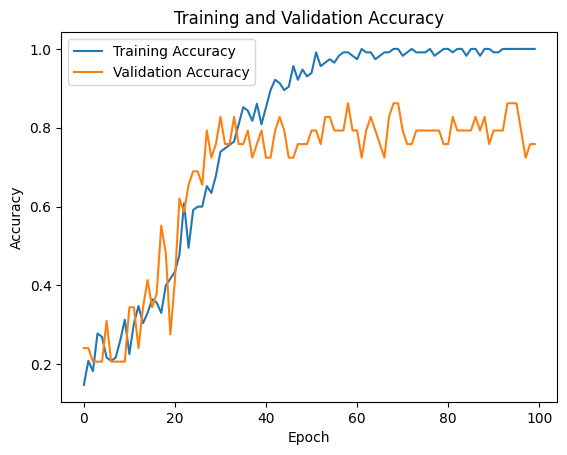

In [145]:
# Plot accuracy
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.savefig('CNN accuracy.png')
plt.show()
